## Syria

2017-01-01           2017-02-01           2017-03-01            \
                  Merged    Normal     Merged    Normal     Merged    Normal   
Precision       0.767352  0.613882   0.787435  0.628062   0.714241  0.574023   
Quality Score   3.707834  3.751736   3.722313  3.759938   3.733081  3.771989   
Recall          1.000000  1.000000   1.000000  1.000000   1.000000  1.000000   

              2017-04-01            
                  Merged    Normal  
Precision       0.633955  0.506667  
Quality Score   3.796389  3.815562  
Recall          1.000000  1.000000

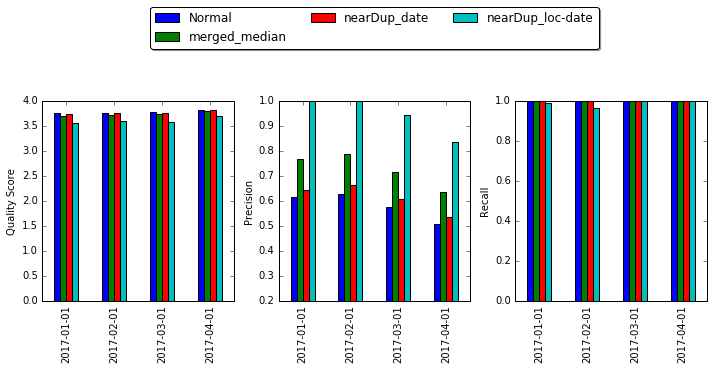

In [49]:
plot_co("Syria")
get_table("Syria")

## Iraq

2017-01-01           2017-02-01           2017-03-01            \
                  Merged    Normal     Merged    Normal     Merged    Normal   
Precision       0.695941  0.665960   0.566904  0.544487   0.592375  0.570621   
Quality Score   3.483345  3.511988   3.481606  3.502693   3.577381  3.600079   
Recall          1.000000  1.000000   1.000000  1.000000   1.000000  1.000000   

              2017-04-01            
                  Merged    Normal  
Precision       0.542725  0.519528  
Quality Score   3.540368  3.556139  
Recall          1.000000  1.000000

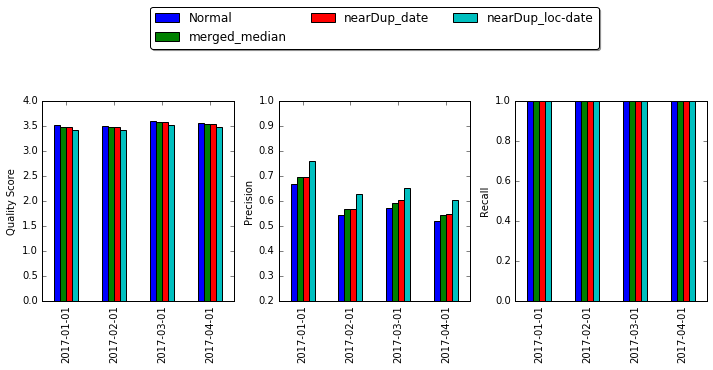

In [50]:
plot_co("Iraq")
get_table("Iraq")

## Yemen

2017-01-01           2017-02-01           2017-03-01            \
                  Merged    Normal     Merged    Normal     Merged    Normal   
Precision       0.333333  0.333333   0.176471  0.176471   0.038462  0.038462   
Quality Score   2.590271  2.590271   3.168917  3.168917   3.090694  3.090694   
Recall          0.714286  0.714286   1.000000  1.000000   1.000000  1.000000   

              2017-04-01            
                  Merged    Normal  
Precision       0.041667  0.041667  
Quality Score   3.095238  3.095238  
Recall          1.000000  1.000000

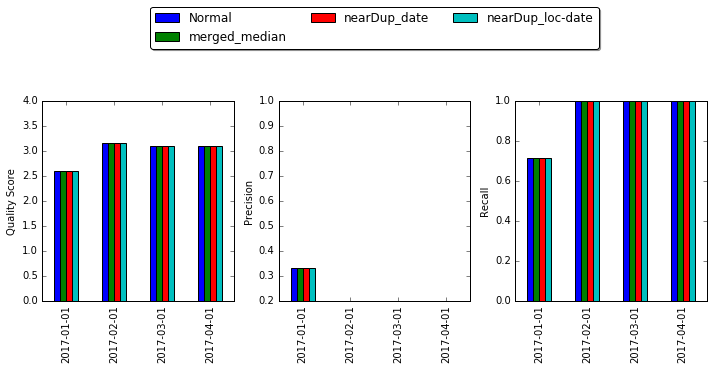

In [51]:
plot_co("Yemen")
get_table("Yemen")

## Saudi Arabia

2017-01-01          2017-02-01           2017-03-01            \
                  Merged   Normal     Merged    Normal     Merged    Normal   
Precision        0.20000  0.20000   0.166667  0.166667   0.375000  0.375000   
Quality Score    3.08937  3.08937   2.659549  2.659549   2.558037  2.558037   
Recall           0.10000  0.10000   0.750000  0.750000   0.600000  0.600000   

              2017-04-01            
                  Merged    Normal  
Precision       0.045455  0.045455  
Quality Score   3.354423  3.354423  
Recall          0.500000  0.500000

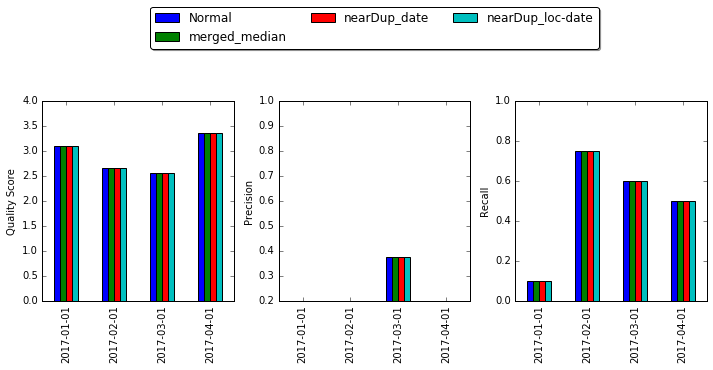

In [52]:
plot_co("Saudi Arabia")
get_table("Saudi Arabia")

## Egypt

2017-01-01           2017-02-01           2017-03-01            \
                  Merged    Normal     Merged    Normal     Merged    Normal   
Precision       0.311881  0.310345   0.301075  0.297872   0.523810  0.521327   
Quality Score   3.381901  3.383253   3.403040  3.409842   3.437715  3.437715   
Recall          1.000000  1.000000   0.982456  0.982456   1.000000  1.000000   

              2017-04-01            
                  Merged    Normal  
Precision       0.211823  0.209756  
Quality Score   3.297894  3.297894  
Recall          1.000000  1.000000

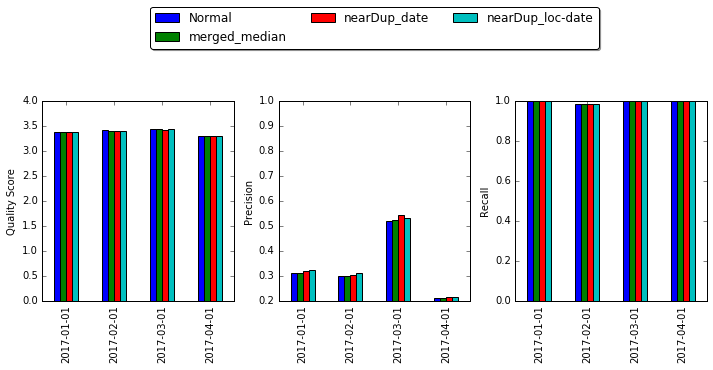

In [53]:
plot_co("Egypt")
get_table("Egypt")

## Lebanon

2017-01-01           2017-02-01           2017-03-01            \
                  Merged    Normal     Merged    Normal     Merged    Normal   
Precision       0.881356  0.881356   0.355932  0.350000   0.356164  0.346667   
Quality Score   3.183566  3.183566   3.496884  3.496885   3.433703  3.430263   
Recall          1.000000  1.000000   1.000000  1.000000   1.000000  1.000000   

              2017-04-01            
                  Merged    Normal  
Precision       0.692308  0.681818  
Quality Score   3.273093  3.286193  
Recall          1.000000  1.000000

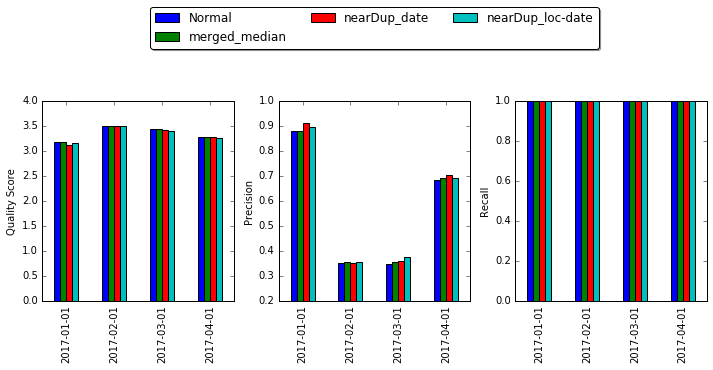

In [54]:
plot_co("Lebanon")
get_table("Lebanon")

In [44]:
%matplotlib inline
import json
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os

def get_scores_df(dirname):
    flist = glob("{}/*".format(dirname))
    scores = {}
    for fname in flist:
        with open(fname) as inf:
            sc = [json.loads(l) for l in open(fname)]
            sc = {l["Results"]["Country"]: l["Results"] for l in sc}
            scores[os.path.basename(fname).split("_")[1].replace(".json", "")] = pd.DataFrame(sc)
    return scores


mmap = {0: "Normal", 1: "nearDup_date", 2: "nearDup_loc-date", 3: "nearDup_loc-date_v1", 4: "merged_v1", 5: "merged_v2", 6: "merged_median"}
def plot(country, qty, ylim, ax):
    merged = {}
    for month in scores_v0.keys():
        merged[month] = {}
        for i, m in enumerate([scores_v0, scores_v1, scores_v2, scores_v3, scores_v4, scores_v5, scores_v6]):
            if i in (3, 4, 5):
                continue
            merged[month][mmap[i]] = m[month][country].ix[qty]
     
    pd.DataFrame(merged).T.plot(ax=ax, kind="bar", legend=False)
    ax.set_ylim(ylim)
    ax.set_ylabel(qty)
    #ax.legend(loc='upper center', bbox_to_anchor=(.5, 1.25),
    #ncol=3, fancybox=True, shadow=True)

def plot_co(country):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,4))

    plot(country, "Quality Score", (0,4), ax[0])
    plot(country, "Precision", (0.2,1), ax[1])
    ax[1].legend(loc='upper center', bbox_to_anchor=(.5, 1.5),
                 ncol=3, fancybox=True, shadow=True)
    plot(country, "Recall", (0,1), ax[2])
    plt.tight_layout()
    
scores_v0 = get_scores_df("../results/allCombined_2017-05-25")   
scores_v1 = get_scores_df("../results/dateOnly_2017-05-25")
scores_v2 = get_scores_df("../results/highBW_2017-05-25")
scores_v3 = get_scores_df("../results/lowBW_2017-05-25")
scores_v4 = get_scores_df("../results/merged_highBW_2017-05-25")
scores_v5 = get_scores_df("../results/merged_lowBW_2017-05-25")
scores_v6 = get_scores_df("../results/merged_median_2017-05-25")

In [48]:
def get_table(country):
    merged = {}
    for month in scores_v0.keys():
        #merged[month] = {}
        merged[(month, "Normal")] = {"Quality Score": scores_v0[month][country].ix["Quality Score"], 
                                  "Precision":scores_v0[month][country].ix["Precision"],
                                  "Recall":scores_v0[month][country].ix["Recall"]}
        merged[(month, "Merged")] = {"Quality Score": scores_v6[month][country].ix["Quality Score"], 
                                  "Precision":scores_v6[month][country].ix["Precision"],
                                  "Recall":scores_v6[month][country].ix["Recall"]}
    
    return pd.DataFrame(merged)
            
    